In [1]:
%load_ext watermark
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

CEPH1463 Setup
==============

We first download the ceph1463 VCF and ped into our data-directory and then run peddy.

We can see the time taken for each check.


In [2]:
DATA = "/data/" # directory where VCFs are KEPT

In [3]:
%%bash -s $DATA
DATA=$1
echo "$1"
mkdir -p plots/
python -m peddy --prefix plots/ceph1463 --plot ${DATA}/ceph1463.vcf.gz ${DATA}/ceph1463.ped

/data/
ped_check
plotting
ran in 6.7 seconds
het_check
ran in 9.0 seconds
sex_check
ran in 5.9 seconds


loaded and subsetted thousand-genomes genotypes (shape: (2504, 18984)) in 0.4 seconds
ran randomized PCA on thousand-genomes samples at 18984 sites in 1.4 seconds
Projected thousand-genomes genotypes and sample genotypes and predicted ancestry via SVM in 0.2 seconds
sex-check: 12404 skipped / 100000 kept


HTML OUTPUT
===========

Below, we embed the HTML output that is the result of the run above.

As expected, we don't see any problems with this data from the well-studied 17-member CEPH pedigree.

In [4]:
from IPython.display import HTML
HTML(data="<iframe src='plots/ceph1463.html' width='100%' height='600px'></iframe>")

Compare to KING
===============

In order to compare to king we need to have plink (and king) installed. We show the time to run both of these on the dataset and then compare the results to those from peddy.

In [5]:
%%bash -s $DATA
DATA=$1
PATH=$DATA:$PATH

if [[ -x $(which plink2) ]]; then
    echo "OK"
else
    conda install -y -c bioconda plink2
fi
cd $DATA
if [[ -x $(which king) ]]; then
    echo "king"
else
    wget http://people.virginia.edu/~wc9c/KING/Linux-king.tar.gz
    tar xzvf Linux-king.tar.gz
fi
cd -

bash ../scripts/king-compare.sh $DATA/ceph1463.vcf.gz 

OK
king
/home/brentp/src/peddy/data
ceph1463
PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ceph1463.log.
Options in effect:
  --allow-extra-chr
  --biallelic-only
  --const-fid
  --geno 0.05
  --make-bed
  --out ceph1463
  --vcf /data//ceph1463.vcf.gz
  --vcf-half-call m

7884 MB RAM detected; reserving 3942 MB for main workspace.
--vcf: ceph1463-temporary.bed + ceph1463-temporary.bim + ceph1463-temporary.fam
written.
(394182 variants skipped.)
7695880 variants loaded from .bim file.
17 people (0 males, 0 females, 17 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ceph1463.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 17 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%

+ VCF=/data//ceph1463.vcf.gz
++ basename /data//ceph1463.vcf.gz .vcf.gz
+ prefix=ceph1463
+ echo ceph1463
+ /usr/bin/time plink2 --const-fid --allow-extra-chr --vcf /data//ceph1463.vcf.gz --make-bed --out ceph1463 --biallelic-only --geno 0.05 --vcf-half-call m
treat these as missing.
45.21user 1.59system 0:48.16elapsed 97%CPU (0avgtext+0avgdata 453928maxresident)k
3069568inputs+798744outputs (2major+66576minor)pagefaults 0swaps
+ /usr/bin/time king --ibs -b ceph1463.bed --kinship --prefix ceph1463
10.13user 0.69system 0:10.85elapsed 99%CPU (0avgtext+0avgdata 1858848maxresident)k
47424inputs+48outputs (1major+384389minor)pagefaults 0swaps


In [6]:
%%bash -s $DATA
DATA=$1
PATH=$DATA:$PATH
# and run on the subset of sites:
bash ../scripts/king-compare.sh ceph1463.peddy.vcf.gz 

ceph1463.peddy
PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ceph1463.peddy.log.
Options in effect:
  --allow-extra-chr
  --biallelic-only
  --const-fid
  --geno 0.05
  --make-bed
  --out ceph1463.peddy
  --vcf ceph1463.peddy.vcf.gz
  --vcf-half-call m

7884 MB RAM detected; reserving 3942 MB for main workspace.
--vcf: ceph1463.peddy-temporary.bed + ceph1463.peddy-temporary.bim +
ceph1463.peddy-temporary.fam written.
(31 variants skipped.)
19960 variants loaded from .bim file.
17 people (0 males, 0 females, 17 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ceph1463.peddy.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 17 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%

+ VCF=ceph1463.peddy.vcf.gz
++ basename ceph1463.peddy.vcf.gz .vcf.gz
+ prefix=ceph1463.peddy
+ echo ceph1463.peddy
+ /usr/bin/time plink2 --const-fid --allow-extra-chr --vcf ceph1463.peddy.vcf.gz --make-bed --out ceph1463.peddy --biallelic-only --geno 0.05 --vcf-half-call m
0.18user 0.22system 0:00.21elapsed 186%CPU (0avgtext+0avgdata 8720maxresident)k
13272inputs+1984outputs (5major+604minor)pagefaults 0swaps
+ /usr/bin/time king --ibs -b ceph1463.peddy.bed --kinship --prefix ceph1463.peddy
0.03user 0.00system 0:00.03elapsed 97%CPU (0avgtext+0avgdata 8376maxresident)k
168inputs+48outputs (1major+1538minor)pagefaults 0swaps


We can see that plink took 45 seconds and KING took 10.5 seconds to run. Now, we compare to the peddy results

In [7]:
%%bash 
conda install -qy statsmodels


Fetching package metadata ...........
Solving package specifications: ..........

Package plan for installation in environment /anaconda:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    statsmodels-0.6.1          |      np111py27_0         5.2 MB  conda-forge

The following packages will be SUPERCEDED by a higher-priority channel:

    statsmodels: 0.6.1-np111py27_1 --> 0.6.1-np111py27_0 conda-forge



<IPython.core.display.Javascript object>


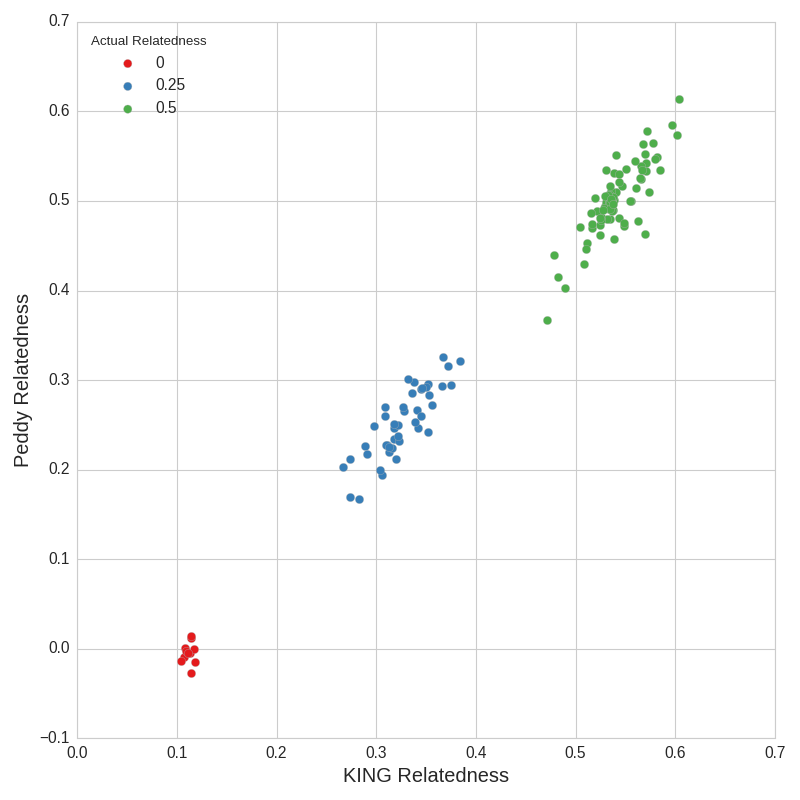

In [22]:
%run ../scripts/king-compare.py ceph1463.ibs plots/ceph1463.ped_check.csv plots/ceph-king-vs-peddy.eps

<IPython.core.display.Javascript object>


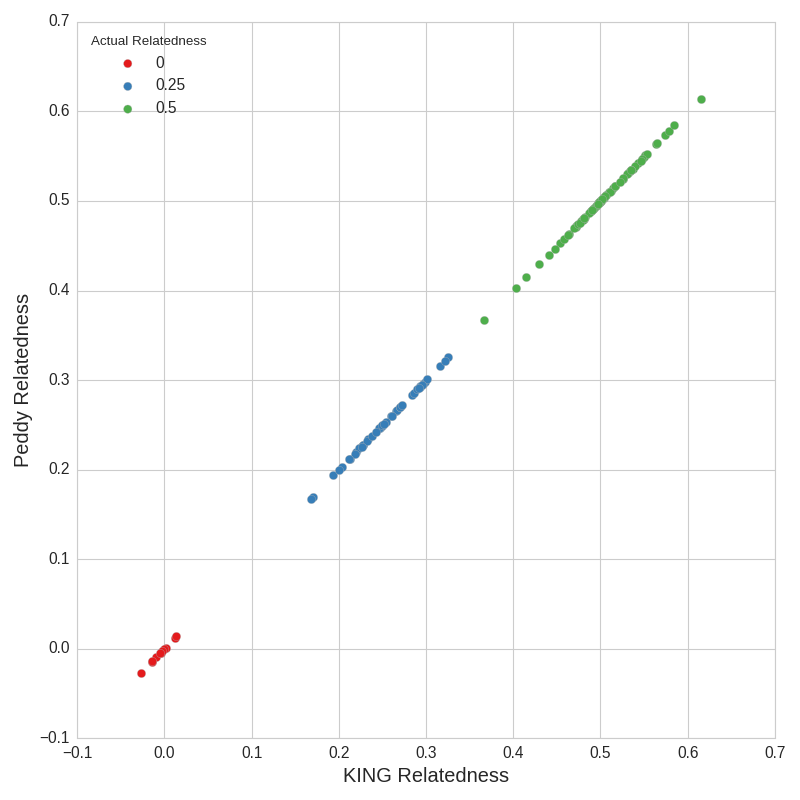

In [23]:
%run ../scripts/king-compare.py ceph1463.peddy.ibs plots/ceph1463.ped_check.csv plots/ceph-sites-king-vs-peddy.eps

Convergence
===========

We sample 23,556 sites by default. Though the user can specify their own sites. We run peddy specifying the `--each` flag which will sub-sample
the sites to the number requested e.g. `--each 4` will have about 5900 sites.

We run the same command, only changing the value to each and then plot the convergence.


In [10]:
%%bash -s $DATA
DATA=$1
for e in $(seq 1 16); do
    python -m peddy --prefix plots/each-$e-ceph1463 ${DATA}/ceph1463.vcf.gz ${DATA}/ceph1463.ped --each $e 2> err
done

ped_check
ran in 5.1 seconds
het_check
ran in 9.6 seconds
sex_check
ran in 5.9 seconds
ped_check
ran in 2.9 seconds
het_check
ran in 10.6 seconds
sex_check
ran in 6.4 seconds
ped_check
ran in 2.1 seconds
het_check
ran in 11.0 seconds
sex_check
ran in 5.8 seconds
ped_check
ran in 1.5 seconds
het_check
ran in 10.3 seconds
sex_check
ran in 6.6 seconds
ped_check
ran in 1.5 seconds
het_check
ran in 12.9 seconds
sex_check
ran in 5.9 seconds
ped_check
ran in 1.3 seconds
het_check
ran in 10.1 seconds
sex_check
ran in 6.2 seconds
ped_check
ran in 1.3 seconds
het_check
ran in 11.3 seconds
sex_check
ran in 6.8 seconds
ped_check
ran in 1.0 seconds
het_check
ran in 10.1 seconds
sex_check
ran in 5.9 seconds
ped_check
ran in 0.8 seconds
het_check
ran in 12.3 seconds
sex_check
ran in 6.2 seconds
ped_check
ran in 1.0 seconds
het_check
ran in 10.6 seconds
sex_check
ran in 5.9 seconds
ped_check
ran in 1.0 seconds
het_check
ran in 10.5 seconds
sex_check
ran in 5.9 seconds
ped_check
ran in 0.7 seconds
het_

<IPython.core.display.Javascript object>


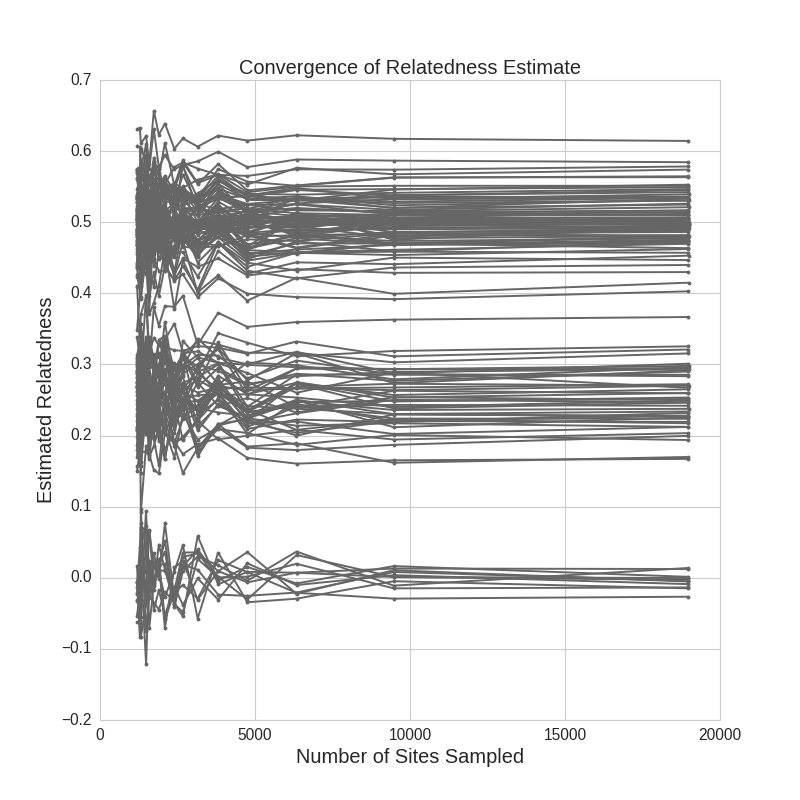

In [24]:

import toolshed as ts
import collections


lines = collections.defaultdict(list)
for i in range(1, 17):
    f = "plots/each-%d-ceph1463.ped_check.csv" % i
    for d in ts.reader(f, sep=","):
        key = d['sample_a'], d['sample_b']
        lines[key].append((int(d['n']), float(d['rel'])))
        
        
fig, ax = plt.subplots(1, figsize=(10, 10))

color='0.9'
        
for (a, b), pairs in lines.items():
    xs, ys = zip(*pairs)
    ax.plot(xs, ys, marker='.', ls='-', color='0.4')
ax.set_xlabel('Number of Sites Sampled', fontsize=18)
ax.set_ylabel('Estimated Relatedness', fontsize=18)
ax.set_title('Convergence of Relatedness Estimate', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('plots/convergence.eps')    
plt.show()

CEPH Error
==========

To demonstrate the use of `peddy`, we **introduce a pedigree error** on a smaller-subset. Note that we see some **unknown sample** warnings because we took a subset of the pedigree file and some samples that are listed as parents no longer appear in the file.

In [12]:
%%bash -s $DATA
DATA=$1
if [[ ! -e $DATA/ceph1463.bad.ped ]]; then
    wget --quiet -O $DATA/ceph1463.bad.ped https://github.com/brentp/peddy/raw/master/data/ceph1463.bad.ped
fi

python -m peddy --prefix plots/bad --plot ${DATA}/ceph1463.vcf.gz ${DATA}/ceph1463.bad.ped

13 samples in vcf not in ped:
NA12881,NA12883,NA12882,NA12885,NA12884,NA12887,NA12886,NA12889,NA12888,NA12892,NA12893,NA12890,NA12891

ped_check
plotting
ran in 7.5 seconds
het_check
ran in 10.6 seconds
sex_check
ran in 5.8 seconds

NOTE: changed sex of samples: NA12880 to female in peddy.ped

NOTE: changed sex of samples: NA12877 to male in peddy.ped


unknown sample: NA12889 in family: CEPH1463
unknown sample: NA12892 in family: CEPH1463
unknown sample: NA12890 in family: CEPH1463
unknown sample: NA12891 in family: CEPH1463
loaded and subsetted thousand-genomes genotypes (shape: (2504, 15839)) in 0.5 seconds
ran randomized PCA on thousand-genomes samples at 15839 sites in 2.6 seconds
Projected thousand-genomes genotypes and sample genotypes and predicted ancestry via SVM in 0.2 seconds
sex-check: 9883 skipped / 100000 kept


In [13]:
HTML(data="<iframe src='plots/bad.html' width='100%' height='600px'></iframe>")

# CEPH Fixed

In [14]:
%%bash -s $DATA
DATA=$1
if [[ ! -e $DATA/ceph1463.good.ped ]]; then
    wget --quiet -O $DATA/ceph1463.good.ped https://github.com/brentp/peddy/raw/master/data/ceph1463.good.ped
fi

python -m peddy --prefix plots/good --plot ${DATA}/ceph1463.vcf.gz ${DATA}/ceph1463.good.ped

12 samples in vcf not in ped:
NA12881,NA12883,NA12882,NA12885,NA12884,NA12887,NA12886,NA12888,NA12892,NA12893,NA12890,NA12891

ped_check
plotting
ran in 7.2 seconds
het_check
ran in 11.0 seconds
sex_check
ran in 5.6 seconds


unknown sample: NA12892 in family: CEPH1463
unknown sample: NA12890 in family: CEPH1463
unknown sample: NA12891 in family: CEPH1463
loaded and subsetted thousand-genomes genotypes (shape: (2504, 16907)) in 0.4 seconds
ran randomized PCA on thousand-genomes samples at 16907 sites in 2.9 seconds
Projected thousand-genomes genotypes and sample genotypes and predicted ancestry via SVM in 0.4 seconds
sex-check: 10569 skipped / 100000 kept


In [15]:
HTML(data="<iframe src='plots/good.html' width='100%' height='600px'></iframe>")

H1K Example
===========

we demonstrate use on an example from the University of Utah Heritage 1K (H1K) project.

In [16]:
%%bash 
PEDDY_MAF_DUMP=plots/h1k.mafs.pkl python -m peddy --plot --prefix plots/h1k ../h1k.sites.vcf.gz h1k.ped 2>err >out
perl -pi -e 's/1[45]-0*/S/g' plots/h1k.html

In [17]:
from IPython.core.display import display, HTML

HTML(data="<iframe src='plots/h1k.html' width='100%' height='600px'></iframe>")

MAF IDR PLOT
============

<IPython.core.display.Javascript object>


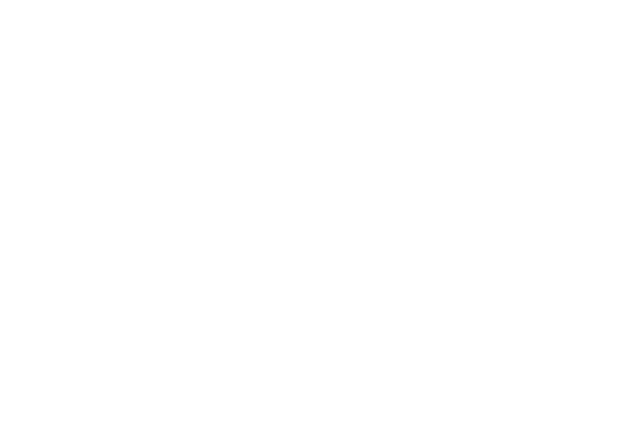

In [18]:
plt.close()
import cPickle
try:
    mafs
except NameError:
    mafs = cPickle.load(open('plots/h1k.mafs.pkl'))
fig, axes = plt.subplots(2)
axes[0].hist(mafs['15-0015084'], 20)
axes[1].hist(mafs['15-0021670'], 20)
axes[1].set_xlabel("Alternate reads / total reads")
axes[0].set_ylabel('Count of heterozygous sites')
axes[1].set_ylabel('Count of heterozygous sites')
axes[0].set_xlim(0, 1)
axes[1].set_xlim(0, 1)
plt.tight_layout()
plt.show()
plt.savefig('plots/idrA.eps')
                    

{'ratio_outlier': 'True', 'PC1': '-0.1427', 'p90': '0.7821', 'PC3': '0.3884', 'het_count': '13104', 'mean_depth': '56.35', 'call_rate': '0.9996', 'sampled_sites': '23239', 'PC4': '-0.6069', 'p10': '0.1636', 'PC2': '-1.488', 'het_ratio': '0.5631', 'idr_baf': '0.6184', 'sample_id': '15-0015084', 'median_depth': '56', 'ancestry-prob': '0.9673', 'depth_outlier': 'False', 'ancestry-prediction': 'EUR'}


<IPython.core.display.Javascript object>


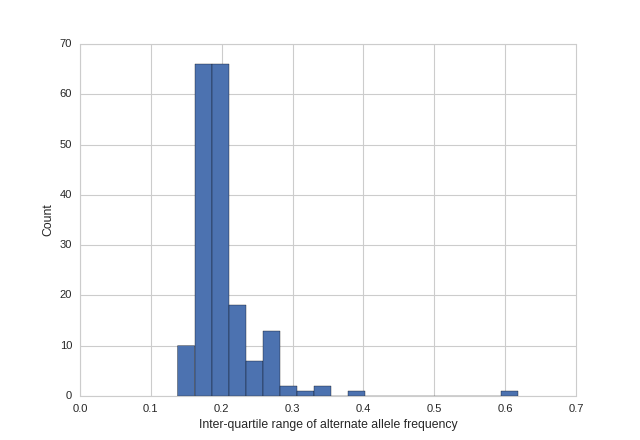

In [19]:
plt.close()
vals = []
for d in ts.reader('plots/h1k.het_check.csv', sep=','):
    vals.append(float(d['idr_baf']))
    if vals[-1] > 0.4: print(d)
        
plt.hist(vals, 20)
plt.xlim(0, 0.7)
plt.xlabel("Inter-quartile range of alternate allele frequency")
plt.ylabel("Count")
plt.show()
plt.savefig("plots/idrB.eps")

In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [21]:
%watermark -v -m -p peddy,scipy,numpy,cyvcf2,scikit-learn,pandas,networkx,toolshed

CPython 2.7.12
IPython 5.0.0

peddy 0.2.7
scipy 0.17.1
numpy 1.11.1
cyvcf2 0.5.3
scikit-learn 0.17.1
pandas 0.18.1
networkx 1.11
toolshed 0.4.6

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.4.0-34-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
